<center>
<img src=https://upload.wikimedia.org/wikipedia/commons/6/69/IMDB_Logo_2016.svg width=800 height=500 />
</center>

<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* In this project we will use IMBD dataset to discover best movies , certificate , rating , duration ... <br>
* The objective of this project is : <br>

1: Loading dataset<br>
2: EDA <br>
3: Cleaning <br>
4:getting infromative insights and infromation 

</div>

<a id="1"></a>
# <p style="padding:10px;background-color:#B01546;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Importing Libraries</p>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import re
pd.set_option('display.max_columns' , None)
import warnings
warnings.filterwarnings('ignore')


<a id="3"></a>
# <p style="padding:10px;background-color:#B01546;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Loading Dataset</p>


<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* Loading dataset and convert it to dataframe to have better view
* showing randomly 7 rows

</div>

In [2]:
dataset = pd.read_csv('IMBD.csv')
df = pd.DataFrame(dataset)
print('View of dataset:')
df.sample(7)

View of dataset:


,title,year,certificate,duration,genre,rating,description,stars,votes
5683,Aelay,(2021),NaN,153 min,"Comedy, Drama",7.0,An unexpected life event forces a young man to...,"['Halitha Shameem', '| ', ' Stars:', 'Manik...",694
4238,Selection Day,(2018– ),NaN,23 min,Sport,7.3,Story of an Indian boy's love of cricket in Mu...,"['Rajesh Tailang, ', 'Mahesh Manjrekar, ', 'Sh...","2,264"
8233,Bleach,(2004–2012),TV-14,24 min,"Animation, Action, Adventure",7.2,"Ichigo and crew defeat the giant, but their en...","['Kino Abe, ', 'Kôji Aritomi', '| ', ' Star...",290
970,Swallow,(I) (2019),R,94 min,"Drama, Thriller",6.5,"Hunter, a newly pregnant housewife, finds hers...","['Carlo Mirabella-Davis', '| ', ' Stars:', ...","23,642"
5360,Highway Racer,(1977),Not Rated,101 min,"Action, Crime, Drama",6.4,A hot-shot police driver has more guts than br...,"['Stelvio Massi', '| ', ' Stars:', 'Maurizi...",549
6556,Hatchimals: Adventures in Hatchtopia,(2018– ),TV-Y,NaN,Animation,7.2,"Follow Cheetree, Penguala, Draggle, and their ...","['Andrea Libman, ', 'Sam Vincent, ', 'Kira Toz...",16
4444,Consent,NaN,NaN,NaN,Drama,NaN,Anothology series examining stories of sexual ...,[],NaN


<a id="3"></a>
# <p style="padding:10px;background-color:#B01546;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Dataset Description</p>


<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* I create a class color to use  of different styles for text such as BULE color , BOLD , UNDERLINE and  END  
to have better and colorful texts  

</div>

In [3]:
class color :
    BLUE = '\033[94m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

In [4]:
print(f'{color.BOLD}The shape of dataset is :{df.shape}')

The shape of dataset is :(9957, 9)


In [5]:
print('Columns are :\n')
print(f'{color.BOLD}{df.columns}')

Columns are :

Index(['title', 'year', 'certificate', 'duration', 'genre', 'rating',
       'description', 'stars', 'votes'],
      dtype='object')


<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* shape is : 9957 samples and 9 features <br>

1- title : The name of the movie <br>
2- year  : The year of production (also series are combined)<br>
3- certificate : each movie has a specific allowence compancy (this column has names of company for each movie)<br>
4- duration : The time for each movie <br>
5- genre : movie kind such as romantic , horror , etc ... . <br>
6- rating : IMBD has a specific score for each movie <br>
7- description : Sumarry of the movie <br>
8- starts : actors and actresses <br>
9- votes : views and opinions of people for the movie <br>
</div>

In [6]:
df.describe(include='all')

,title,year,certificate,duration,genre,rating,description,stars,votes
count,9957,9430,6504,7921,9884,8784.000000,9957,9957,8784
unique,7912,498,20,291,569,NaN,9433,8615,4862
top,Top Gear,(2020),TV-MA,60 min,Comedy,NaN,Add a Plot,[],30
freq,92,663,2520,385,859,NaN,434,403,33
mean,NaN,NaN,NaN,NaN,NaN,6.764515,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,1.214840,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.700000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,6.100000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,6.900000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,7.600000,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9957 non-null   object 
 1   year         9430 non-null   object 
 2   certificate  6504 non-null   object 
 3   duration     7921 non-null   object 
 4   genre        9884 non-null   object 
 5   rating       8784 non-null   float64
 6   description  9957 non-null   object 
 7   stars        9957 non-null   object 
 8   votes        8784 non-null   object 
dtypes: float64(1), object(8)
memory usage: 700.2+ KB


<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* we can observe that just three columns dont have null values and others have with different amont of null values
* type of year , duration and votes features can be numeric but ther are object 
* so , I am going to create a function to descripe all the details  like dtype , unique values , count ,<br>
missing values and perecntage of missing values


</div>

In [8]:
def dataset_details(dataset):
    feature = []
    dtype = []
    unique =[]
    count = []
    missing_values=[]
    missing_percentage = []
    
    for column in df.columns :
        feature.append(column)
        dtype.append(df[column].dtype)
        unique.append(df[column].unique())
        count.append(len(df[column]))
        missing_values.append(df[column].isnull().sum())
        missing_percentage.append(round((df[column].isnull().sum()/len(df))*100 , 2))
        
        
    details = pd.DataFrame({
        'Feature' : feature , 
        'Type' : dtype , 
        'Count' : count , 
        'Unique' : unique , 
        "Missed Values" : missing_values,
        'Missed Percent%' : missing_percentage,
       
    })
    
    return details

In [9]:
dataset_details(df)

,Feature,Type,Count,Unique,Missed Values,Missed Percent%
0,title,object,9957,"[Cobra Kai, The Crown, Better Call Saul, Devil...",0,0.00
1,year,object,9957,"[(2018– ), (2016– ), (2015–2022), (2022), (202...",527,5.29
2,certificate,object,9957,"[TV-14, TV-MA, NC-17, R, PG-13, nan, TV-PG, PG...",3453,34.68
3,duration,object,9957,"[30 min, 58 min, 46 min, 356 min, 24 min, 45 m...",2036,20.45
4,genre,object,9957,"[Action, Comedy, Drama, Biography, Drama, Hist...",73,0.73
5,rating,float64,9957,"[8.5, 8.7, 8.9, 5.9, 8.6, 7.8, 9.2, 9.5, 6.3, ...",1173,11.78
6,description,object,9957,[Decades after their 1984 All Valley Karate To...,0,0.00
7,stars,object,9957,"[['Ralph Macchio, ', 'William Zabka, ', 'Court...",0,0.00
8,votes,object,9957,"[177,031, 199,885, 501,384, 9,773, 15,413, 116...",1173,11.78


<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* we can see that certificate and duarion have the hieghest missed values with 34% , 20% respectively.<br>
* rating and year have also 1173 and 537 missed values stands for approximately 12 % and 5%<br>
* lets check duplicated values:<br>
</div>

In [10]:
df.duplicated().sum()

np.int64(0)

<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* There is no duplicated values<br>
* lets show again Missed values by a illustration mode to have better insights<br>
</div>

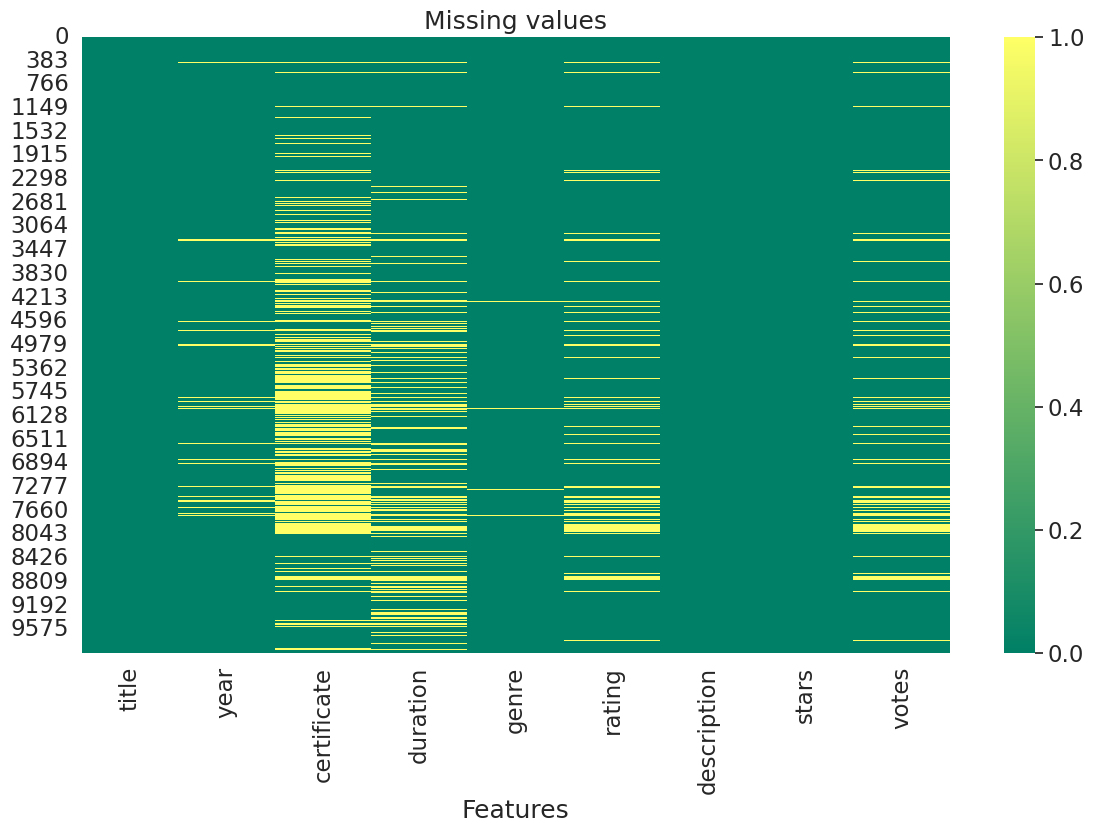

In [11]:
sns.set(style="darkgrid",font_scale=1.5)
plt.figure(figsize=(14,8))
sns.heatmap(df.isnull(),cmap="summer")
plt.xlabel('Features')
plt.title('Missing values')
plt.show()

<a id="3"></a>
# <p style="padding:10px;background-color:#B01546;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Cleaning and EDA</p>


<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* Lets fill all missed values by NAN 
</div>

In [12]:
df.fillna('NAN' , inplace=True)

<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* column year requires to be cleaned => except numbers and NAN we will put space<br> 
* we fill one or more spaces with just one space <br>
* now we have good looking year column
</div>

In [13]:

# df['year'] = df['year'].apply(lambda x : x.split('(')[1].split(')')[0])
df['year'] = df['year'].apply(lambda x : re.sub('[^0-9NAN-]' , ' ' ,x))
df['year'] = df['year'].apply(lambda x : re.sub(r'[ ]+' , ' ' , x))
df.head(6)

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,2018,TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,2016,TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,2015 2022,TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,2022,TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,2022,TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"
5,The Sandman,2022,TV-MA,45 min,"Drama, Fantasy, Horror",7.8,Upon escaping after decades of imprisonment by...,"['Tom Sturridge, ', 'Boyd Holbrook, ', 'Patton...","116,358"


<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* checking all unique values and its numbers<br>
* useing plotly to visualize this column
</div>

In [14]:
print(f'{color.BOLD}Unique years is :  ' , len(df.year.unique()))
print('*' * 30)
df.year.unique()

Unique years is :   270
******************************


array([' 2018 ', ' 2016 ', ' 2015 2022 ', ' 2022 ', ' 2013 ',
       ' 2008 2013 ', ' 2010 2022 ', ' 2013 2022 ', ' 2021 ', ' 2001 ',
       ' 2005 ', ' 2005 2020 ', ' 2011 ', ' 2003 ', ' 1994 2004 ',
       ' 2011 2021 ', ' 2009 2020 ', ' 2017 2022 ', ' 2011 2019 ',
       ' 2013 2020 ', ' 2019 ', ' 1989 1998 ', ' 2016 2021 ',
       ' 2019 2023 ', ' 2013 2021 ', ' 2000 2007 ', ' 2014 ', ' 2015 ',
       ' 2020 2023 ', ' 2013 2023 ', ' 2020 2022 ', ' 2017 2020 ',
       ' 2009 2017 ', ' 1999 ', ' 2016 2022 ', ' 2005 2014 ',
       ' 2009 2015 ', ' 2015 2018 ', ' 2010 ', ' 2015 2020 ', ' 2002 ',
       ' 2000 ', ' 2012 ', ' 2017 ', ' 2008 2014 ', ' 2007 2015 ',
       ' 2014 2023 ', ' 2009 ', ' 2015 2019 ', ' 1998 2006 ', ' 2020 ',
       ' 1997 ', ' 2010 2017 ', ' 2006 2013 ', ' 2011 2018 ',
       ' 2010 2015 ', ' 2001 2017 ', ' 1987 1994 ', ' 2014 2020 ',
       ' 2017 2021 ', ' 2013 2019 ', ' 1993 ', ' 2005 2017 ', ' 1975 ',
       ' 2010 2013 ', ' 1995 ', ' 2017 2019 ', ' 1984 199

In [15]:
hist = px.histogram(df['year'] , x='year' , title='Year distribution',color='year' , height=700 , width=900)
hist.show()

<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* Obviousely , most movies years are between 2010 and 2022 

</div>

<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* lets check certificate feature<br>
* one third of the rows are missed <br>
* TV-MA and TV-14 have the highest certificate allowance with 2520 and 1209 respectively<br>
* lets show this column 
</div>

In [2]:
print(f'{color.BOLD}Most repeated certificate')
print('*' * 30)
df.certificate.value_counts().to_frame().style.highlight_max(color='red')

NameError: name 'color' is not defined

In [ ]:
c_hist = px.histogram(df['certificate'],x='certificate' ,title='Certificate Districution' ,  color='certificate')
c_hist.show()

<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* It's time for duration column <br>
* the amount of unique ones and printing all of them <br>
</div>

In [ ]:
print(f'{color.BLUE}The len of unique duration is : {color.END}{len(df.duration.unique())}')
print('***' * 30)
df['duration'].unique()

<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* It is better to convert the column name based on minute and then take each sample value and convert the column to integer <br>
* so we take value first , change the column name into duration(min) stands for minute , replace all NAN to 0 and convert to integer<br>
* and lets show its distribution to have better understanding
</div>

In [ ]:
df['duration'] = df['duration'].apply(lambda x : x.split(' ')[0])
df.rename(columns={'duration' : 'duration(min)'} , inplace=True )
df['duration(min)'].replace({'NAN': 0} , inplace=True)
df['duration(min)']=df['duration(min)'].astype(int)

In [ ]:
D_hist = px.histogram(df['duration(min)'] , x='duration(min)' , title='Duration' , color='duration(min)')
D_hist.show()

<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* transparently , most of them are between about 30 - 130 minutes<br>
* lets look at thoes less than an hour <br>
* we can see that more than half of them are less than 60 minutes<br>
</div>

In [ ]:
print(f'{color.BOLD}The number of movies with less duration that 60 minuts : ', len(df[df['duration(min)']<60]))
print('***' * 30)
df[df['duration(min)']<60]

<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* Here, im showing those movies with highest duration <br>
* the highest one is close to 1000 minutes <br>
</div>

In [ ]:
most_duration = df.sort_values(by='duration(min)' , ascending=False)[['title','duration(min)']][:20]
plt.figure(figsize=(15,15))
sns.barplot(x=most_duration['duration(min)'], y=most_duration['title'])
plt.title('Highest duration' , color='gray' ,size=30)
plt.show()

<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* Each move has a combination of genres <br>
* Comedy( 859 ) , Animation Action( 553) , Drama(587) and Documentaru(518) have the hieghest repetition <br>

</div>

In [ ]:
G_hist = px.histogram(df['genre'] , x='genre' , title='Genre' , color='genre' , height=600 , width=2000)
G_hist.show()

<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* Becuase we want to show rating feature we put NaN values as 0 => 0 doesnt mean  that they have 0 scores(means NAN)<br>
* change the dtype to float <br>
* now lets look at hieghest rates <br>
* if we want to show lowest ones we can remove 0 ones , but I focus on hieghest ones<br>
* And I show top ten movies with the hieghest rating<br>
</div>

In [ ]:
df['rating'].replace({'NAN':0} , inplace=True)
df['rating'] = df['rating'].astype(float)


In [ ]:
print(f'{color.BOLD}Ordered based on highest rating')
print('**' * 30)
df.sort_values(by='rating' , ascending=False)

In [ ]:
df.sort_values(by='rating' , ascending=False)[['title' , 'rating']].head(10).plot(kind='bar',
                                                                                  x='title' , y='rating',
                                                                                  figsize=(10,5),
                                                                                  title='Hieghest 10 rating',
                                                                                 )
plt.xlabel('Movie' , c='gray')
plt.ylabel('Score' , c='gray')
plt.xticks(rotation = 80 , color='k')
plt.show()

<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* I only show 10 top movies with its descriptions <br>
* And then I clean the texts to have better looking<br>
</div>

In [ ]:
df.sort_values(by='rating' , ascending=False)[['title' , 'rating' , 'description']].head(10)

In [ ]:
dataset["stars"]= dataset["stars"].apply(lambda x : re.sub('[^a-zA-Z]' ,',' ,x))
dataset['stars']= dataset['stars'].apply(lambda x : re.sub(r'\,+' , ',' , x))
dataset.sort_values(by='rating' , ascending=False)[['title' , 'rating' , 'stars']][:20]

<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* Like the rating column I put 0 as NUll values for vote column <br>
* cleaning the column => except numbers put string<br>
* then change the dtype <br>
* let's show top ten movies with hieghest votes<br>

In [ ]:
df['votes'].replace({'NAN':'0'} , inplace=True)
df['votes'] = df['votes'].apply(lambda x : re.sub('[^0-9]', '' , x))
df['votes'] = df['votes'].astype(int)

In [ ]:
df.sort_values(by='votes' , ascending=False)[['title' , 'rating' , 'votes']][:20].plot(kind='bar' ,
                                                                                       x='title' ,
                                                                                       y='votes',
                                                                                     color='pink')
plt.xlabel('Movies')
plt.ylabel('votes')
plt.title('Most votes', size=20)
plt.show()

<a id="3"></a>
# <p style="padding:10px;background-color:#B01546;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">End </p>

<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* We have discovered all momentous information and details together <br>
* Thank you for your support  
 
</div>